<a href="https://colab.research.google.com/github/leahnagy/yoga_pose_classifier/blob/main/code/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Yoga Pose Classification Dataset/TRAIN

/content/gdrive/MyDrive/Colab Notebooks/Yoga Pose Classification Dataset/TRAIN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
from tqdm import tqdm

In [ ]:
# Get class labels
labels = list()
path='/content/gdrive/MyDrive/Colab Notebooks/Yoga Pose Classification Dataset/TRAIN/'
os.listdir(path)
for i in os.listdir(path):
  labels.append(i)

In [ ]:
labels

['warrior2', 'downdog', 'tree', 'plank', 'goddess']

In [ ]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :warrior2= 252
Length of :downdog= 223
Length of :tree= 158
Length of :plank= 266
Length of :goddess= 180
Total Samples:1079


In [ ]:
img_size = 224
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

100%|██████████| 180/180 [00:42<00:00,  4.27it/s]


In [ ]:
X[0]

array([[[0.95686275, 0.96078431, 0.98039216],
        [0.95686275, 0.96078431, 0.98039216],
        [0.95294118, 0.95686275, 0.97647059],
        ...,
        [0.96862745, 0.97254902, 0.98823529],
        [0.97254902, 0.97647059, 0.99215686],
        [0.97254902, 0.97647059, 0.99215686]],

       [[0.95686275, 0.96078431, 0.98039216],
        [0.95686275, 0.96078431, 0.98039216],
        [0.95294118, 0.95686275, 0.97647059],
        ...,
        [0.96862745, 0.97254902, 0.98823529],
        [0.97254902, 0.97647059, 0.99215686],
        [0.97254902, 0.97647059, 0.99215686]],

       [[0.95686275, 0.96078431, 0.98039216],
        [0.95686275, 0.96078431, 0.98039216],
        [0.94901961, 0.95294118, 0.97254902],
        ...,
        [0.96862745, 0.97254902, 0.98823529],
        [0.97254902, 0.97647059, 0.99215686],
        [0.97254902, 0.97647059, 0.99215686]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

In [ ]:
Y.shape

(1079,)

In [ ]:
Y

array([0, 0, 0, ..., 4, 4, 4])

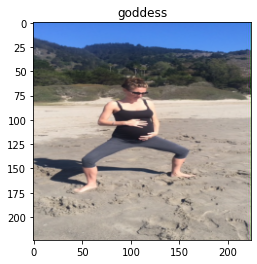

In [ ]:
# visualize sample image
plt.imshow(X[1000])
plt.title(labels[Y[1000]])
plt.show()

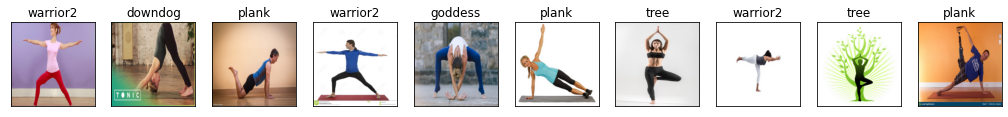

In [ ]:
# Show multiple random images
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,1079)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

### Repeat process with test set

In [ ]:
test_path='/content/gdrive/MyDrive/Colab Notebooks/Yoga Pose Classification Dataset/TEST/'
# os.listdir(test_path)

In [ ]:
## Counting the Samples
Total_sample=0
for i in os.listdir(test_path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(test_path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(test_path,i)))
print(f'Total Samples:{Total_sample}')

Length of :warrior2= 109
Length of :goddess= 80
Length of :tree= 69
Length of :downdog= 97
Length of :plank= 115
Total Samples:470


In [ ]:
img_size = 224
X_test=[] 
Y_test=[]
i=0
for idx,img in enumerate(labels):
    for img_name in tqdm(os.listdir(test_path+img)):
        if i<300:
            img_file=imread(test_path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X_test.append(img_file)
                Y_test.append(idx)
        else:
            break
        i=i+1
    i=0
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

 30%|██▉       | 34/115 [00:46<00:24,  3.33it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)
100%|██████████| 80/80 [00:34<00:00,  2.30it/s]


In [ ]:
X_test[400]

array([[[0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        ...,
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608]],

       [[0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        ...,
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608]],

       [[0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        ...,
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608]],

       ...,

       [[0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0.91372549, 0.89019608],
        [0.90980392, 0

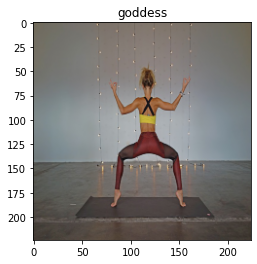

In [ ]:
# visualize sample image
plt.imshow(X_test[400])
plt.title(labels[Y_test[400]])
plt.show()

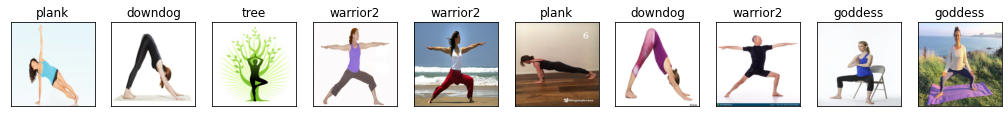

In [ ]:
# Show multiple random images
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,470)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[rn])
    plt.title(labels[Y_test[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
with open('X_train.npy', 'wb') as f:
  np.save(f, X)

In [ ]:
with open('Y_train.npy', 'wb') as f:
  np.save(f, Y)

In [ ]:
with open('X_test1.npy', 'wb') as f:
  np.save(f, X_test)

In [ ]:
with open('Y_test1.npy', 'wb') as f:
  np.save(f, Y_test)